In [1]:
import importlib
import numpy as np

from constants import *
import utils
importlib.reload(utils)

<module 'utils' from '/mnt/cb8c2a81-32e7-40bc-af74-0c1386cda683/programowanie/pipelon/Classifier-Builder/utils.py'>

In [2]:
x_train, y_train = utils.new_load_data('training')
x_test, y_test = utils.new_load_data('testing')
x_val, y_val = utils.new_load_data('validation')

# x_train, y_train = x_train[:10000], y_train[:10000]
# x_test, y_test = x_test[:3000], y_test[:3000]

x_train.shape, y_test.shape, y_val.shape 

((55120, 40), (14904, 2), (10976, 2))

In [3]:
print(f"Classes: {STATES}")
print(f"Class distribution for train: {np.unique(y_train, return_counts=True)}")
print(f"Class distribution for test: {np.unique(y_test, return_counts=True)}")
print(f"Class distribution for valid: {np.unique(y_val, return_counts=True)}")

Classes: ['boredom', 'flow']
Class distribution for train: (array([0, 1], dtype=int32), array([55120, 55120]))
Class distribution for test: (array([0, 1], dtype=int32), array([14904, 14904]))
Class distribution for valid: (array([0, 1], dtype=int32), array([10976, 10976]))


In [4]:
import tensorflow as tf

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='../models/phase_2/phase_2_model.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.6,
    patience=3,
    min_lr=1e-6,
    verbose=1
)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu6', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(len(STATES), activation='softmax'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
  x_train, 
  y_train, 
  epochs=15, 
  verbose=1,
  validation_data=(x_test, y_test),
  callbacks=[checkpoint_callback, lr_scheduler]
)


2025-02-18 10:59:22.861521: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-18 10:59:22.887679: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-18 10:59:22.895745: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-18 10:59:22.916564: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/jakubner/anaconda3/lib/python

Epoch 1/15


I0000 00:00:1739872772.101768   16002 service.cc:146] XLA service 0x7b1d88005480 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739872772.101808   16002 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-02-18 10:59:32.196242: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-18 10:59:32.446095: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90300


  32/1723 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5224 - loss: 1.4127

I0000 00:00:1739872773.911846   16002 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1723/1723 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6537 - loss: 0.6763
Epoch 1: val_loss improved from inf to 0.41701, saving model to ../models/phase_2/phase_2_model.keras
1723/1723 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6537 - loss: 0.6762 - val_accuracy: 0.8048 - val_loss: 0.4170 - learning_rate: 0.0010
Epoch 2/15
1716/1723 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8361 - loss: 0.3728
Epoch 2: val_loss improved from 0.41701 to 0.34275, saving model to ../models/phase_2/phase_2_model.keras
1723/1723 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8362 - loss: 0.3727 - val_accuracy: 0.8513 - val_loss: 0.3428 - learning_rate: 0.0010
Epoch 3/15
1718/1723 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8816 - loss: 0.2869
Epoch 3: val_loss improved from 0.34275 to 0.28210, saving model to ../models/phase_2/phase_2_model.keras
1723/1723 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8816 - loss: 0.2869 - val_accuracy: 0.8876 - val_loss: 0.2821 - learning_rate: 0.0010
Epo

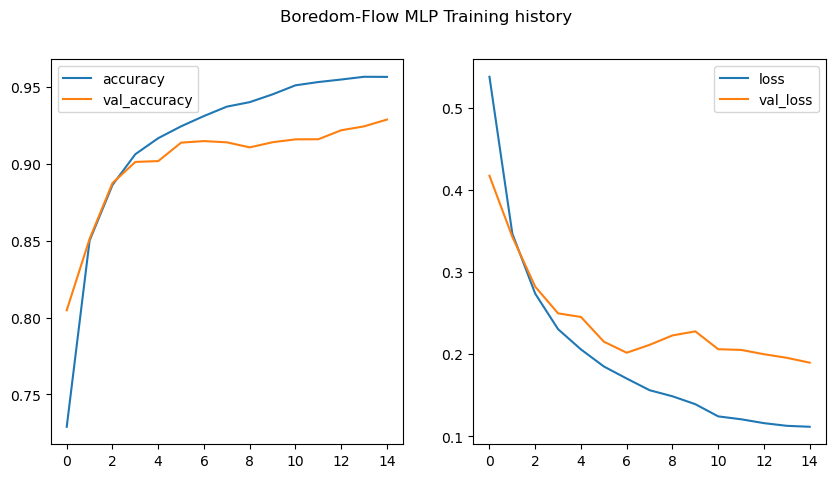

In [5]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  
fig.suptitle('Boredom-Flow MLP Training history')

axs[0].plot(history.history['accuracy'], label='accuracy')
axs[0].plot(history.history['val_accuracy'], label='val_accuracy')
axs[0].legend()

axs[1].plot(history.history['loss'], label='loss')
axs[1].plot(history.history['val_loss'], label='val_loss')
axs[1].legend()
plt.show()

In [6]:

from sklearn.metrics import classification_report, confusion_matrix
best_model = tf.keras.models.load_model('../models/phase_2/phase_2_model.keras')
y_pred = best_model.predict(x_test).argmax(axis=1)

true_y = y_test.argmax(axis=1)
utils.present_confusion_matrix(confusion_matrix(true_y, y_pred))
utils.present_metrics(classification_report(true_y, y_pred, target_names=STATES, output_dict=True))

466/466 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Confusion Matrix:
+-----------------+--------------------+-----------------+
|                 | Predicted: boredom | Predicted: flow |
+-----------------+--------------------+-----------------+
| Actual: boredom |        6713        |       715       |
|  Actual: flow   |        344         |      7132       |
+-----------------+--------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|   boredom    |   0.951   | 0.904  |  0.927   | 7428.0  |
|     flow     |   0.909   | 0.954  |  0.931   | 7476.0  |
|   accuracy   |   0.929   | 0.929  |  0.929   |  0.929  |
|  macro avg   |   0.93    | 0.929  |  0.929   | 14904.0 |
| weighted avg |   0.93    | 0.929  |  0.929   | 14904.0 |
+--------------+-----------+--------+----------+---------+


In [7]:
MODEL_NAME = 'boredom-flow-30-11'

best_model.export(f'./tmp-{MODEL_NAME}')

!python -m tf2onnx.convert \
        --saved-model f"tmp-{MODEL_NAME}" \
        --output f"./exported_models/{MODEL_NAME}" \
        --opset 9 
!rm -r f"tmp-{MODEL_NAME}"

INFO:tensorflow:Assets written to: ./tmp-boredom-flow-30-11/assets


INFO:tensorflow:Assets written to: ./tmp-boredom-flow-30-11/assets


Saved artifact at './tmp-boredom-flow-30-11'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 40), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  135368488842064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135368488842448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135368488842640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135368488843600: TensorSpec(shape=(), dtype=tf.resource, name=None)
2025-02-18 11:01:12.257732: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-18 11:01:12.301849: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-18 11:01:

In [8]:
example = x_test[0].reshape(1, -1)
example.astype(np.float32).shape

(1, 40)

In [9]:

import numpy as np
import onnxruntime as rt

session = rt.InferenceSession("./output/mnist1.onnx")
input_name = session.get_inputs()[0].name
label_name = [o.name for o in session.get_outputs()]
 
print(f'input={input_name}, output={label_name}')

print(f'onnx pred: {session.run(label_name, {input_name: example.astype(np.float32)})}')


ModuleNotFoundError: No module named 'onnxruntime'

In [ ]:
print('accuracy:', svm.score(x_test, y_test))

from sklearn.metrics import classification_report, confusion_matrix
y_pred = svm.predict(x_test)

utils.present_confusion_matrix(confusion_matrix(y_test, y_pred))
utils.present_metrics(classification_report(y_test, y_pred, target_names=STATES, output_dict=True))

accuracy: 0.7133333333333334
Confusion Matrix:
+-----------------+--------------------+-----------------+
|                 | Predicted: boredom | Predicted: flow |
+-----------------+--------------------+-----------------+
| Actual: boredom |        1397        |       95        |
|  Actual: flow   |        765         |       743       |
+-----------------+--------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|   boredom    |   0.646   | 0.936  |  0.765   | 1492.0  |
|     flow     |   0.887   | 0.493  |  0.633   | 1508.0  |
|   accuracy   |   0.713   | 0.713  |  0.713   |  0.713  |
|  macro avg   |   0.766   | 0.715  |  0.699   | 3000.0  |
| weighted avg |   0.767   | 0.713  |  0.699   | 3000.0  |
+--------------+-----------+--------+----------+---------+
